In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import TweetTokenizer
import torch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import analysis
from train import *


/home/runxuan/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2') 

In [22]:
subreddit = "Showerthoughts"
df = pd.read_csv(f"./data/csvdata/{subreddit}.csv")
df = analysis.cleanDataConcatenate(df)
df

,Title,Text,Upvotes,Subreddit,Num_comments,nsfw,Upvote_ratio,Has_text
0,The best way to go unrecognized by others thes...,the best way to go unrecognized by others thes...,1,Showerthoughts,1,False,1.00,True
1,Evaporated black coffee is a direct measure of...,evaporated black coffee is a direct measure of...,3,Showerthoughts,13,False,0.67,True
2,You are close to someone on discord when they ...,you are close to someone on discord when they ...,1,Showerthoughts,1,False,0.57,True
3,Every POV Is Actually A Camera´s POV,every pov is actually a camera´s pov,1,Showerthoughts,1,False,1.00,True
4,If I can’t believe it’s not butter isn’t butte...,if i can’t believe it’s not butter isn’t butte...,1,Showerthoughts,1,False,1.00,True
...,...,...,...,...,...,...,...,...
294346,Big guys are often ashamed to show love to the...,big guys are often ashamed to show love to the...,3,Showerthoughts,10,False,0.58,True
294347,Not getting posted because,not getting posted because,1,Showerthoughts,1,False,1.00,True
294348,WhateverItTakesFromYou Quote,whateverittakesfromyou quote,1,Showerthoughts,1,False,1.00,True
294349,Movies from the 90’s regularly showed people a...,movies from the 90’s regularly showed people a...,1,Showerthoughts,1,False,1.00,True


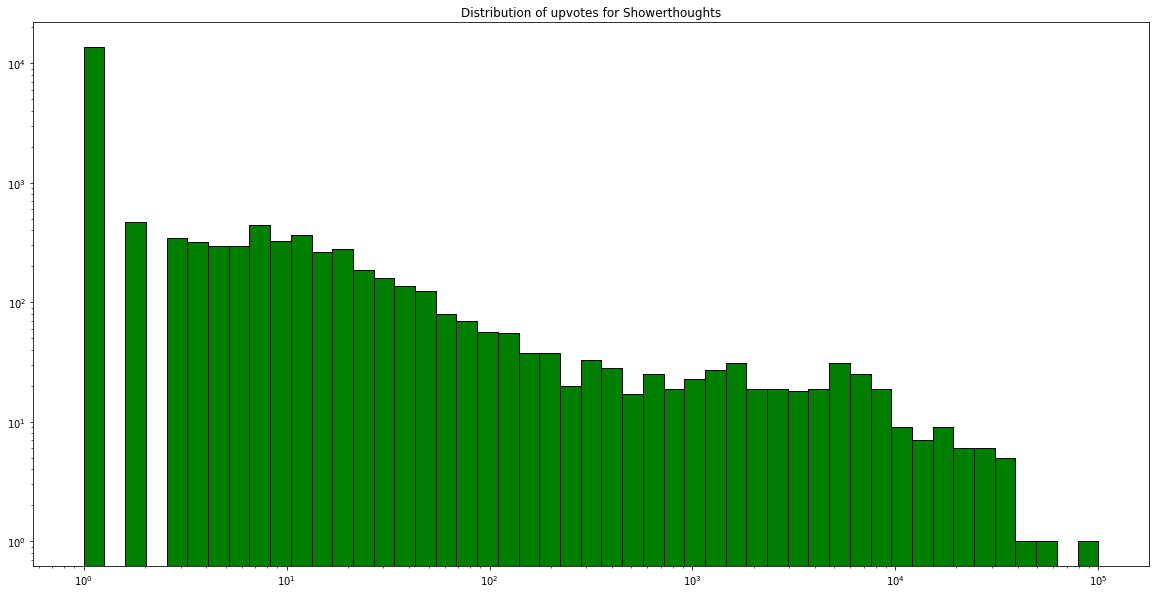

In [6]:
analysis.upvoteHist(df)

/tmp/ipykernel_12371/1186738976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Upvotes'] = np.log(tempdf['Upvotes'])


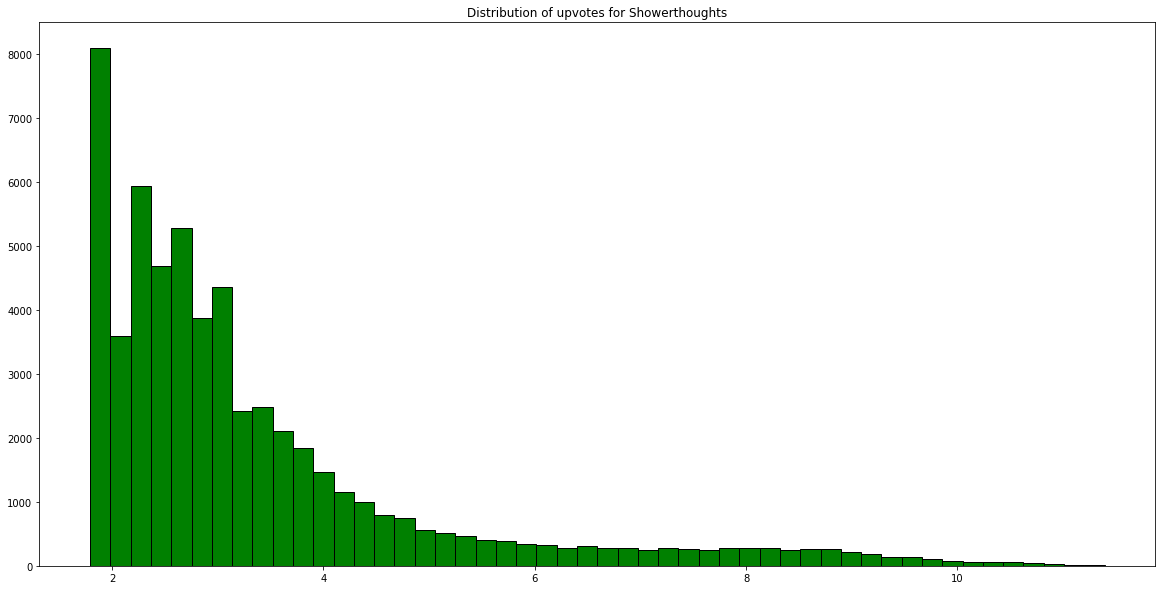

In [30]:
    figure(figsize=(20, 10))
    tempdf = df[df['Upvotes'] > 5]
    tempdf['Upvotes'] = np.log(tempdf['Upvotes'])
    plt.hist(tempdf['Upvotes'], bins=50, log=False, edgecolor='black', color='green')
    plt.title(f"Distribution of upvotes for {subreddit}")
    plt.show()

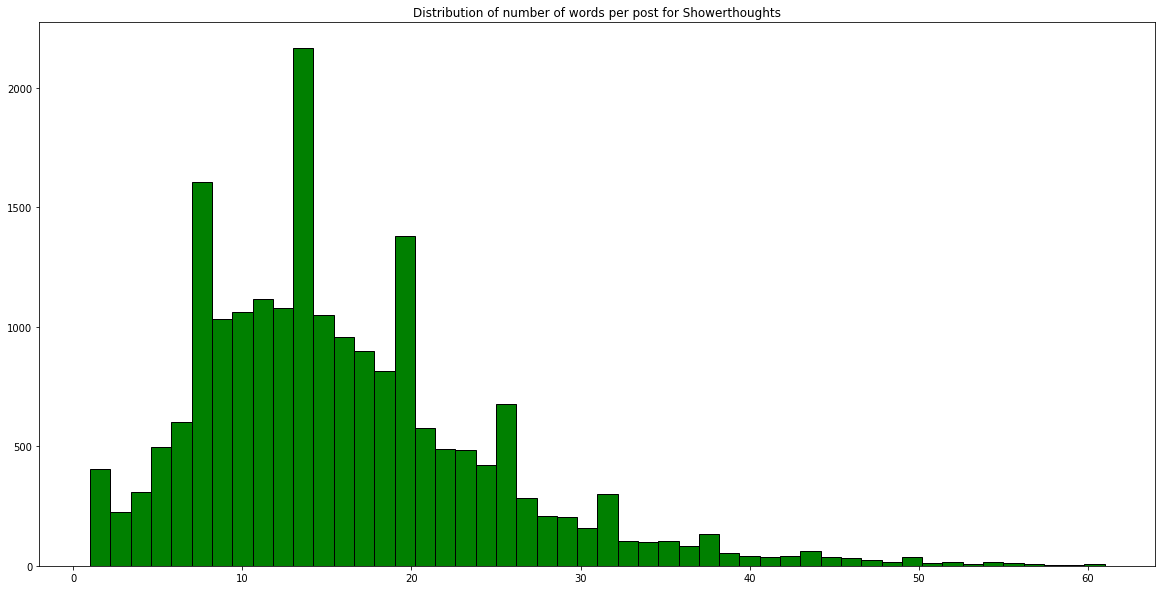

In [7]:
analysis.numWordsHist(df)

In [ ]:
X = model.encode(df['Text'].to_numpy())
y = df['Upvotes'].to_numpy()

In [ ]:
crossValidate(X, y, trainOLS, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainRidge, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainLasso, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainElasticNet, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainRandomForest, evalsklearn, mse)